In [1]:
from sklearn import cross_validation, datasets, linear_model, metrics, ensemble, preprocessing, learning_curve, grid_search

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [70]:
#study = pd.read_csv('study_plus_tnm_without_inform.csv', sep=';')
#study = pd.read_csv('study_without_inform.csv', sep=';')
study = pd.read_csv('bmos.csv', sep=',')
#study = pd.read_csv('study_plus_tnm.csv', sep=';')
print(study.head())
print (study.columns)

   Name        altitudeMo  cartodb_id  adm4_id  adm3_id   osm_id       id  \
0  1213  relativeToGround         203  -102269 -1029256 -1320570 -1320570   
1  1225  relativeToGround         205  -102269 -1029256 -1257403 -1257403   
2  1219  relativeToGround         204  -102269 -1029256  -181288  -181288   
3   919  relativeToGround         154  -102269 -1029256 -1320371 -1320371   
4   925  relativeToGround         155  -102269 -1029256  -442741  -442741   

   transport  price_hous         saldo  ...   name_en  oktmo_name  oktmo_code  \
0         17    2.155273  21325.477390  ...       NaN        1215    45377000   
1         14    2.671203  19915.984100  ...       NaN        1227    45909000   
2         13    2.577267  -6796.038378  ...       NaN        1221    45317000   
3         17    2.864380  21528.215130  ...       NaN         921    45330000   
4         14    3.763951  49227.022300  ...       NaN         927    45366000   

   okato_name  okato_code  labor       area     pa

In [71]:
#data=study.drop('target',axis=1)
data=study.drop(['cartodb_id','Name', 'altitudeMo', 'adm4_id', 'adm3_id', 'osm_id','id','saldo', 'forecastpr', 'fot_area','adm4_name', 'adm3_name', 'name_lat', 'name_en', 'oktmo_name',
       'oktmo_code', 'okato_name', 'okato_code', 'param','class', 'area2', 'price_hous', 'price_h', 'b_area_tim'], axis=1)
print(data.head())

ValueError: labels ['price_h'] not contained in axis

In [73]:
target = study.ix[:,'price_h']
print(target.head())

KeyError: 'price_h'

In [62]:
data.columns

Index(['transport', 'fot', 'inv', 'salary', 'citizen', 'labor', 'area',
       'summ'],
      dtype='object')

In [63]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target, 
                                                                                    test_size = 0.3,
                                                                                    random_state = 0)

In [69]:
train_labels [4]

171256.0

In [35]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 0)

In [39]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

ValueError: Unknown label type: (6      154077.0
59     199238.0
118    145966.0
94     178906.0
108    146780.0
51     193641.0
116    158540.0
68     229309.0
27     156450.0
18     150322.0
105    162153.0
11     140263.0
89     194420.0
73     184290.0
107    150854.0
101    144195.0
96     187443.0
1      137678.0
76     127406.0
42     156450.0
41     118409.0
4      171256.0
15     206569.0
17     173381.0
52     213547.0
40     118409.0
38     148020.0
5      206109.0
53     171893.0
113    238341.0
         ...   
122    177773.0
72     187443.0
77     160311.0
25     242662.0
37     207420.0
81     149614.0
109    145966.0
46     149437.0
112    194668.0
39     201009.0
102    127760.0
65     181280.0
58     157761.0
12     211351.0
110    176498.0
88     148020.0
70     162153.0
87     144195.0
36     147276.0
114    170902.0
21     150216.0
83     150216.0
9      151952.0
103    137005.0
120    233701.0
67     138705.0
64     324518.0
117    161500.0
47     256724.0
44     118409.0
Name: price_h, dtype: float64,)

#### Визуализация датасета

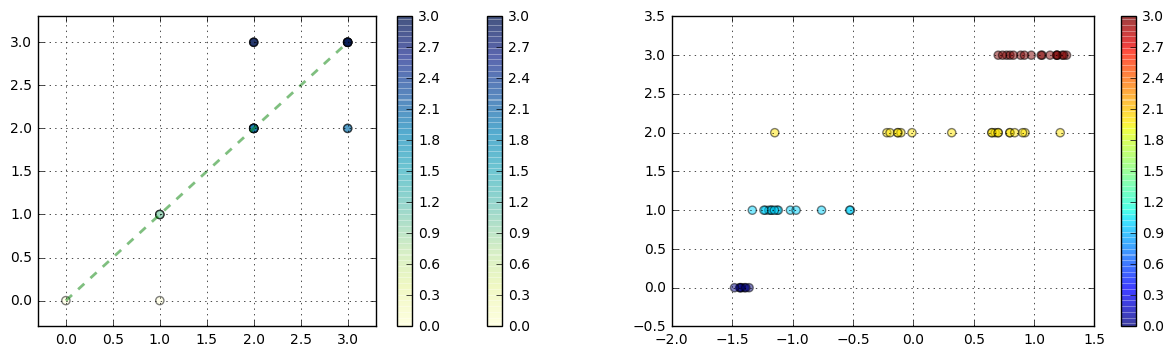

In [15]:
standardized_data = preprocessing.scale(data)
standardized_data = pd.DataFrame(standardized_data, index=data.index, columns=data.columns)
x = standardized_data.ix[:,' qv ']
u = standardized_data.ix[:,' inform ']
z = standardized_data.ix[:,'﻿number']

t = data.ix[:,'﻿number']
y = target

plt.figure(figsize=(15, 4))
ax1 = plt.subplot(121)
cmap1 = plt.cm.get_cmap('YlGnBu')
sc1 = ax1.scatter(test_labels.values, rf_predictions, c=rf_predictions, s=35, cmap=cmap1, alpha=0.5)
plt.plot([0, 3], [0, 3], '--', color = 'green', linewidth = '2.0', alpha = 0.5)
plt.colorbar(sc1, ax=ax1)
plt.xlim([-0.3, 3.3])
plt.ylim([-0.3, 3.3])
plt.grid(True)
plt.colorbar(sc1, ax=ax1)

ax2 = plt.subplot(122)
cmap2 = plt.cm.get_cmap('jet')
sc2 = ax2.scatter(x, y, c=y, s=35, cmap=cmap2, alpha=0.5)
plt.colorbar(sc2, ax=ax2)
plt.grid(True)

plt.show()

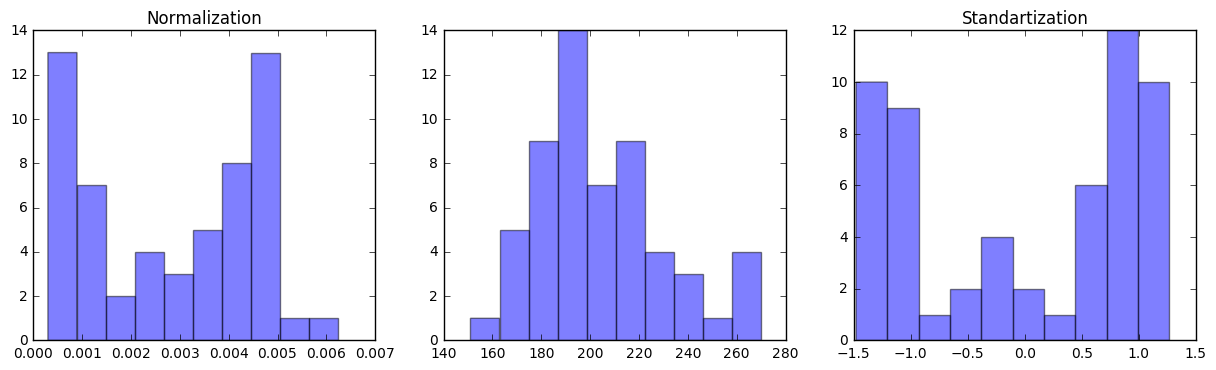

In [26]:
pylab.figure(figsize=(15, 4))
pylab.subplot(1,3,1)
plt.hist(normalize_data.ix[:,' qv '], alpha=0.5)
plt.title('Normalization')
pylab.subplot(1,3,2)
plt.hist(t, alpha=0.5)
plt.title('')
pylab.subplot(1,3,3)
plt.hist(x, alpha=0.5)
plt.title('Standartization')
plt.show()

#### Cтандартизация и нормализация

In [27]:
standardized_data = preprocessing.scale(data)
normalize_data = preprocessing.normalize(data)
normalize_data = pd.DataFrame(normalize_data, index=data.index, columns=data.columns)
#normalized_data = preprocessing.normalize(data)
standardized_data = pd.DataFrame(standardized_data, index=data.index, columns=data.columns)
standardized_data.head()

C:\Users\Артём\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,transport,fot,inv,salary,citizen,labor,area,summ
0,2.144506,-0.458459,-0.314553,0.129319,-1.471629,-0.493758,-0.194910,1.054801
1,0.548891,-0.412576,-0.284599,-0.093829,2.104763,-0.432495,3.653862,-0.605431
2,0.017020,-0.304369,-0.182476,-0.223190,-0.556201,-0.283488,1.363518,-0.812960
3,2.144506,-0.478092,-0.309916,-0.763940,-1.251838,-0.515547,0.435920,-0.328726
4,0.548891,-0.479783,-0.347180,-0.490686,-1.571391,-0.518765,-0.177692,-0.812960


#### Отбор признаков

In [28]:
model = ensemble.ExtraTreesClassifier()
model.fit(data, target)
# display the relative importance of each attribute
print(model.feature_importances_)

ValueError: Unknown label type: array([[ 118409.],
       [ 137678.],
       [ 127760.],
       [ 118409.],
       [ 171256.],
       [ 206109.],
       [ 154077.],
       [ 173381.],
       [ 201327.],
       [ 151952.],
       [ 140263.],
       [ 140263.],
       [ 211351.],
       [ 170724.],
       [ 127406.],
       [ 206569.],
       [ 201327.],
       [ 173381.],
       [ 150322.],
       [ 145576.],
       [ 187974.],
       [ 150216.],
       [ 242662.],
       [ 145966.],
       [ 156308.],
       [ 242662.],
       [ 163534.],
       [ 156450.],
       [ 169485.],
       [ 135304.],
       [ 242662.],
       [ 143982.],
       [ 184290.],
       [ 143982.],
       [ 169485.],
       [ 173027.],
       [ 147276.],
       [ 207420.],
       [ 148020.],
       [ 201009.],
       [ 118409.],
       [ 118409.],
       [ 156450.],
       [ 178906.],
       [ 118409.],
       [ 149437.],
       [ 149437.],
       [ 256724.],
       [ 172920.],
       [ 175329.],
       [ 165659.],
       [ 193641.],
       [ 213547.],
       [ 171893.],
       [ 205507.],
       [ 171893.],
       [ 172708.],
       [ 334719.],
       [ 157761.],
       [ 199238.],
       [ 300432.],
       [ 224882.],
       [ 232355.],
       [ 254989.],
       [ 324518.],
       [ 181280.],
       [ 296997.],
       [ 138705.],
       [ 229309.],
       [ 140263.],
       [ 162153.],
       [ 207420.],
       [ 187443.],
       [ 184290.],
       [ 148551.],
       [ 150854.],
       [ 127406.],
       [ 160311.],
       [ 151066.],
       [ 135304.],
       [ 170724.],
       [ 149614.],
       [ 149614.],
       [ 150216.],
       [ 145576.],
       [ 147276.],
       [ 144514.],
       [ 144195.],
       [ 148020.],
       [ 194420.],
       [ 199379.],
       [ 173806.],
       [ 158000.],
       [ 145966.],
       [ 178906.],
       [ 145966.],
       [ 187443.],
       [ 145576.],
       [ 170902.],
       [ 144549.],
       [ 147489.],
       [ 144195.],
       [ 127760.],
       [ 137005.],
       [ 181280.],
       [ 162153.],
       [ 166332.],
       [ 150854.],
       [ 146780.],
       [ 145966.],
       [ 176498.],
       [ 162011.],
       [ 194668.],
       [ 238341.],
       [ 170902.],
       [ 171256.],
       [ 158540.],
       [ 161500.],
       [ 145966.],
       [ 163534.],
       [ 233701.],
       [ 151952.],
       [ 177773.],
       [ 176498.],
       [ 250136.]])

#### Построение алгоритма

In [30]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(standardized_data, target,test_size = 0.1,
                                                                                     random_state = 0)
rf_classifier= ensemble.RandomForestClassifier(n_estimators = 100, max_depth =20, random_state = 0)
rf_classifier.fit(train_data,train_labels)
rf_predictions_proba = rf_classifier.predict_proba(test_data)
rf_predictions = rf_classifier.predict(test_data)
print(test_labels.values)
print (rf_predictions)
print (rf_predictions_proba)
print (metrics.classification_report(test_labels, rf_predictions))
print (metrics.confusion_matrix(test_labels, rf_predictions))

ValueError: Unknown label type: array([[ 172920.],
       [ 144514.],
       [ 127760.],
       [ 144549.],
       [ 145576.],
       [ 242662.],
       [ 149437.],
       [ 172708.],
       [ 173806.],
       [ 145966.],
       [ 224882.],
       [ 201327.],
       [ 242662.],
       [ 171256.],
       [ 170724.],
       [ 143982.],
       [ 150854.],
       [ 163534.],
       [ 163534.],
       [ 232355.],
       [ 300432.],
       [ 250136.],
       [ 151066.],
       [ 118409.],
       [ 296997.],
       [ 154077.],
       [ 199238.],
       [ 145966.],
       [ 178906.],
       [ 146780.],
       [ 193641.],
       [ 158540.],
       [ 229309.],
       [ 156450.],
       [ 150322.],
       [ 162153.],
       [ 140263.],
       [ 194420.],
       [ 184290.],
       [ 150854.],
       [ 144195.],
       [ 187443.],
       [ 137678.],
       [ 127406.],
       [ 156450.],
       [ 118409.],
       [ 171256.],
       [ 206569.],
       [ 173381.],
       [ 213547.],
       [ 118409.],
       [ 148020.],
       [ 206109.],
       [ 171893.],
       [ 238341.],
       [ 158000.],
       [ 118409.],
       [ 169485.],
       [ 169485.],
       [ 171893.],
       [ 173027.],
       [ 145966.],
       [ 148551.],
       [ 143982.],
       [ 147489.],
       [ 334719.],
       [ 145966.],
       [ 166332.],
       [ 184290.],
       [ 181280.],
       [ 127406.],
       [ 147276.],
       [ 145576.],
       [ 135304.],
       [ 175329.],
       [ 149614.],
       [ 151952.],
       [ 176498.],
       [ 135304.],
       [ 140263.],
       [ 170724.],
       [ 187974.],
       [ 177773.],
       [ 187443.],
       [ 160311.],
       [ 242662.],
       [ 207420.],
       [ 149614.],
       [ 145966.],
       [ 149437.],
       [ 194668.],
       [ 201009.],
       [ 127760.],
       [ 181280.],
       [ 157761.],
       [ 211351.],
       [ 176498.],
       [ 148020.],
       [ 162153.],
       [ 144195.],
       [ 147276.],
       [ 170902.],
       [ 150216.],
       [ 150216.],
       [ 151952.],
       [ 137005.],
       [ 233701.],
       [ 138705.],
       [ 324518.],
       [ 161500.],
       [ 256724.],
       [ 118409.]])

#### Визуализация эффективности угадывания

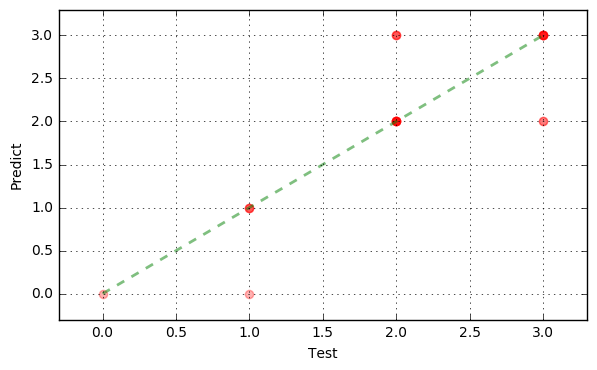

In [11]:
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(121)
sc1 = ax1.scatter(test_labels.values, rf_predictions, s=35, color='red', alpha=0.3)
plt.xlabel('Test')
plt.ylabel('Predict')
plt.plot([0, 3], [0, 3], '--', color = 'green', linewidth = '2.0', alpha = 0.5)
plt.xlim([-0.3, 3.3])
plt.ylim([-0.3, 3.3])
plt.grid(True)
# координаты, только целые числа ! добавить
plt.show()

In [122]:
%%time
scorer = metrics.make_scorer(metrics.accuracy_score)
cv_strategy = cross_validation.StratifiedShuffleSplit(target, n_iter = 40 , test_size = 0.1, random_state = 2)
rf_scoring = cross_validation.cross_val_score(rf_classifier, standardized_data, target, scoring = scorer, cv = cv_strategy)
print('RF mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring.mean(), rf_scoring.max(), 
                                                     rf_scoring.min(), rf_scoring.std()))

RF mean:0.7291666666666666, max:1.0, min:0.3333333333333333, std:0.18888378261071895
Wall time: 9.27 s


#### Сетка

In [133]:
rf_classifier.get_params().keys()

dict_keys(['warm_start', 'criterion', 'min_weight_fraction_leaf', 'bootstrap', 'min_samples_leaf', 'class_weight', 'verbose', 'max_leaf_nodes', 'random_state', 'n_estimators', 'max_depth', 'max_features', 'n_jobs', 'min_samples_split', 'oob_score'])

In [217]:
parameters_grid = {
    'n_estimators' : list(range(2,100,5)) ,
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(2,100,5)) ,
}

In [218]:
cv_strategy = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 20 , test_size = 0.2, random_state = 0)

In [219]:
grid_cv = grid_search.GridSearchCV(rf_classifier, parameters_grid, scoring = 'accuracy', cv = cv_strategy)

In [220]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 47min 39s


GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 3 1 3 0 3 0 1 2 0 0 1 3 1 3 3 1 2 3 2 2 1 0 3 2 1 2 2 2 1 1 3 1 2], n_iter=20, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97], 'max_depth': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [221]:
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=97, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [222]:
print (grid_cv.best_score_)
print (grid_cv.best_params_)

0.821428571429
{'n_estimators': 97, 'max_depth': 2, 'max_features': 'auto'}


In [223]:
grid_cv.grid_scores_[:10]

[mean: 0.52857, std: 0.15714, params: {'n_estimators': 2, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.65000, std: 0.13151, params: {'n_estimators': 7, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.69286, std: 0.13758, params: {'n_estimators': 12, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.72857, std: 0.13477, params: {'n_estimators': 17, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.72857, std: 0.13477, params: {'n_estimators': 22, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.71429, std: 0.14983, params: {'n_estimators': 27, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.77857, std: 0.13151, params: {'n_estimators': 32, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.77857, std: 0.15303, params: {'n_estimators': 37, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.78571, std: 0.14639, params: {'n_estimators': 42, 'max_depth': 2, 'max_features': 'auto'},
 mean: 0.78571, std: 0.13924, params: {'n_estimators': 47, 'max_depth': 2, 'max_features': 'auto'}]

In [224]:
randomized_grid_cv = grid_search.RandomizedSearchCV(rf_classifier, parameters_grid, scoring = 'accuracy', cv = cv_strategy, n_iter = 20, 
                                                   random_state = 0)

In [225]:
%%time
randomized_grid_cv.fit(train_data, train_labels)

Wall time: 50.6 s


RandomizedSearchCV(cv=StratifiedShuffleSplit(labels=[0 3 1 3 0 3 0 1 2 0 0 1 3 1 3 3 1 2 3 2 2 1 0 3 2 1 2 2 2 1 1 3 1 2], n_iter=20, test_size=0.2, random_state=0),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97], 'max_depth': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97], 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          scoring='accuracy', verbose=0)

In [226]:
print (randomized_grid_cv.best_score_)
print (randomized_grid_cv.best_params_)

0.771428571429
{'n_estimators': 37, 'max_depth': 7, 'max_features': 'sqrt'}


## Мультикласс - бинаризация

### бинаризация ответов для обучения

In [127]:
target_class_0 = []
for i in target:
    if i==0:
        target_class_0 += [1]
    else:
        target_class_0 += [0]

In [8]:
print(target_class_0)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [9]:
target_class_1 = []
for i in target:
    if i==1:
        target_class_1 += [1]
    else:
        target_class_1 += [0]

In [10]:
print(target_class_1)

[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [11]:
target_class_2 = []
for i in target:
    if i==2:
        target_class_2 += [1]
    else:
        target_class_2 += [0]

In [12]:
print(target_class_2)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]


In [13]:
target_class_3 = []
for i in target:
    if i==3:
        target_class_3 += [1]
    else:
        target_class_3 += [0]

In [14]:
print(target_class_3)

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [15]:
train_data_class_0, test_data_class_0, train_labels_class_0, test_labels_class_0 = cross_validation.train_test_split(data, target_class_0, 
                                                                                     test_size = 0.2)

In [16]:
train_data_class_1, test_data_class_1, train_labels_class_1, test_labels_class_1 = cross_validation.train_test_split(data, target_class_1, 
                                                                                     test_size = 0.2)

In [17]:
train_data_class_2, test_data_class_2, train_labels_class_2, test_labels_class_2 = cross_validation.train_test_split(data, target_class_2, 
                                                                                     test_size = 0.2)

In [18]:
train_data_class_3, test_data_class_3, train_labels_class_3, test_labels_class_3 = cross_validation.train_test_split(data, target_class_3, 
                                                                                     test_size = 0.2)

### random forest 

#### class 0 

In [19]:
rf_classifier= ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 1)

In [20]:
rf_classifier.fit(train_data_class_0,train_labels_class_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [21]:
rf_predictions_class_0 = rf_classifier.predict(test_data_class_0)

In [22]:
prob_rf_predictions_class_0 = rf_classifier.predict_proba(test_data_class_0)

In [23]:
matrix_class_0 = metrics.confusion_matrix(test_labels_class_0, rf_predictions_class_0)
print (matrix_class_0)

[[11  0]
 [ 0  1]]


In [24]:
metrics.accuracy_score(test_labels_class_0, rf_predictions_class_0)

1.0

In [25]:
metrics.f1_score(test_labels_class_0, rf_predictions_class_0, pos_label = 0)

1.0

In [26]:
metrics.f1_score(test_labels_class_0, rf_predictions_class_0)

1.0

In [27]:
print (metrics.classification_report(test_labels_class_0, rf_predictions_class_0))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00        12



In [28]:
fpr_c0, tpr_c0, __c0 = metrics.roc_curve(test_labels_class_0, prob_rf_predictions_class_0[:,1])

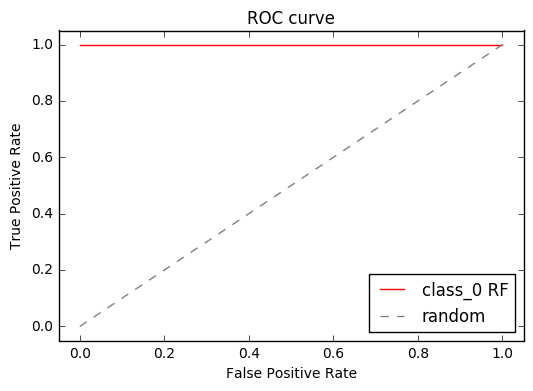

In [29]:
pylab.plot(fpr_c0, tpr_c0, label = 'class_0 RF', color = 'red',)
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [30]:
metrics.roc_auc_score(test_labels_class_0,rf_predictions_class_0)

1.0

In [31]:
metrics.roc_auc_score(test_labels_class_0, prob_rf_predictions_class_0[:,1])

1.0

In [32]:
metrics.average_precision_score(test_labels_class_0, rf_predictions_class_0)

1.0

In [33]:
metrics.log_loss(test_labels_class_0, prob_rf_predictions_class_0[:,1])

0.0997090638187932

#### class 1

In [34]:
rf_classifier.fit(train_data_class_1,train_labels_class_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [35]:
rf_predictions_class_1 = rf_classifier.predict(test_data_class_1)

In [36]:
prob_rf_predictions_class_1 = rf_classifier.predict_proba(test_data_class_1)

In [37]:
matrix_class_1 = metrics.confusion_matrix(test_labels_class_1, rf_predictions_class_1)
print (matrix_class_1)

[[11  1]
 [ 0  0]]


In [38]:
metrics.accuracy_score(test_labels_class_1, rf_predictions_class_1)

0.91666666666666663

In [39]:
metrics.f1_score(test_labels_class_1, rf_predictions_class_1)

C:\Users\Артём\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [40]:
metrics.f1_score(test_labels_class_1, rf_predictions_class_1, pos_label = 0)

0.95652173913043481

In [41]:
print (metrics.classification_report(test_labels_class_1, rf_predictions_class_1))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        12
          1       0.00      0.00      0.00         0

avg / total       1.00      0.92      0.96        12



C:\Users\Артём\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [42]:
fpr_c1, tpr_c1, __c1 = metrics.roc_curve(test_labels_class_1, prob_rf_predictions_class_1[:,1])

C:\Users\Артём\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:538: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


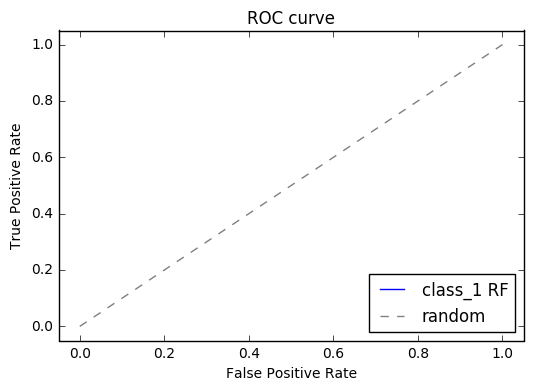

In [43]:
pylab.plot(fpr_c1, tpr_c1, label = 'class_1 RF')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [138]:
metrics.roc_auc_score(test_labels_class_1,rf_predictions_class_1)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
metrics.roc_auc_score(test_labels_class_1, prob_rf_predictions_class_1[:,1])

In [ ]:
metrics.average_precision_score(test_labels_class_1, rf_predictions_class_1)

In [45]:
metrics.log_loss(test_labels_class_1, prob_rf_predictions_class_1[:,1])

0.17091985992914208

#### class 2

In [46]:
rf_classifier.fit(train_data_class_2,train_labels_class_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [47]:
rf_predictions_class_2 = rf_classifier.predict(test_data_class_2)

In [48]:
prob_rf_predictions_class_2 = rf_classifier.predict_proba(test_data_class_2)

In [49]:
matrix_class_2 = metrics.confusion_matrix(test_labels_class_2, rf_predictions_class_2)
print (matrix_class_2)

[[7 3]
 [1 1]]


In [50]:
metrics.accuracy_score(test_labels_class_2, rf_predictions_class_2)

0.66666666666666663

In [51]:
metrics.f1_score(test_labels_class_2, rf_predictions_class_2)

0.33333333333333331

In [52]:
metrics.f1_score(test_labels_class_1, rf_predictions_class_1, pos_label = 0)

0.95652173913043481

In [53]:
print (metrics.classification_report(test_labels_class_2, rf_predictions_class_2))

             precision    recall  f1-score   support

          0       0.88      0.70      0.78        10
          1       0.25      0.50      0.33         2

avg / total       0.77      0.67      0.70        12



In [54]:
fpr_c2, tpr_c2, __c2 = metrics.roc_curve(test_labels_class_2, prob_rf_predictions_class_2[:,1])

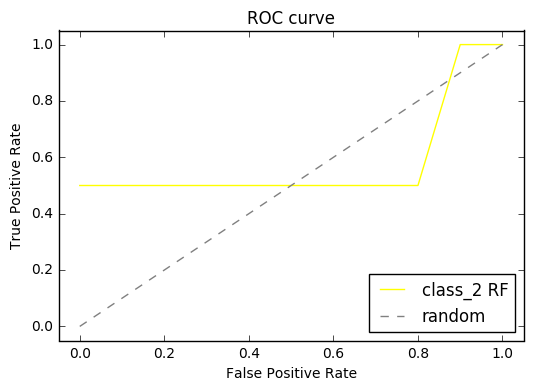

In [55]:
pylab.plot(fpr_c2, tpr_c2, label = 'class_2 RF', color = 'yellow')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [56]:
metrics.roc_auc_score(test_labels_class_2,rf_predictions_class_2)

0.59999999999999987

In [57]:
metrics.roc_auc_score(test_labels_class_2, prob_rf_predictions_class_2[:,1])

0.57499999999999996

In [58]:
metrics.average_precision_score(test_labels_class_2, rf_predictions_class_2)

0.41666666666666663

In [59]:
metrics.log_loss(test_labels_class_2, prob_rf_predictions_class_2[:,1])

0.57475103426632712

#### class 3

In [60]:
rf_classifier.fit(train_data_class_3,train_labels_class_3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [61]:
rf_predictions_class_3 = rf_classifier.predict(test_data_class_3)

In [62]:
prob_rf_predictions_class_3 = rf_classifier.predict_proba(test_data_class_3)

In [63]:
matrix_class_3 = metrics.confusion_matrix(test_labels_class_3, rf_predictions_class_3)
print (matrix_class_3)

[[8 1]
 [1 2]]


In [64]:
metrics.accuracy_score(test_labels_class_3, rf_predictions_class_3)

0.83333333333333337

In [65]:
metrics.f1_score(test_labels_class_3, rf_predictions_class_3)

0.66666666666666663

In [66]:
metrics.f1_score(test_labels_class_3, rf_predictions_class_3, pos_label = 0)

0.88888888888888884

In [67]:
print (metrics.classification_report(test_labels_class_3, rf_predictions_class_3))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89         9
          1       0.67      0.67      0.67         3

avg / total       0.83      0.83      0.83        12



In [68]:
fpr_c3, tpr_c3, __c3 = metrics.roc_curve(test_labels_class_3, prob_rf_predictions_class_3[:,1])

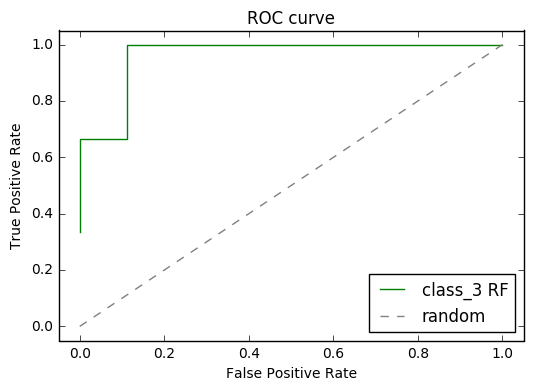

In [69]:
pylab.plot(fpr_c3, tpr_c3, label = 'class_3 RF', color = 'green')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [70]:
metrics.roc_auc_score(test_labels_class_3,rf_predictions_class_3)

0.77777777777777768

In [71]:
metrics.roc_auc_score(test_labels_class_3, prob_rf_predictions_class_3[:,1])

0.96296296296296302

In [72]:
metrics.average_precision_score(test_labels_class_3, rf_predictions_class_3)

0.70833333333333326

In [73]:
metrics.log_loss(test_labels_class_3, prob_rf_predictions_class_3[:,1])

0.304907158018349

#### Оценка качества по cross-validation

#### cross_val_score

In [74]:
rf_scoring_class_0= cross_validation.cross_val_score(rf_classifier, data, target_class_0, scoring = 'accuracy', cv = 7)

In [75]:
rf_scoring_class_0

array([ 1.   ,  0.875,  1.   ,  1.   ,  0.875,  1.   ,  0.875])

In [76]:
print('RF class 0 mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring_class_0.mean(), rf_scoring_class_0.max(), 
                                                     rf_scoring_class_0.min(), rf_scoring_class_0.std()))

RF class 0 mean:0.9464285714285714, max:1.0, min:0.875, std:0.06185895741317419


In [77]:
rf_scoring_class_1= cross_validation.cross_val_score(rf_classifier, data, target_class_1, scoring = 'accuracy', cv = 7)

In [78]:
rf_scoring_class_1

array([ 0.88888889,  0.625     ,  0.625     ,  0.875     ,  1.        ,
        0.75      ,  0.75      ])

In [79]:
print('RF class 1 mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring_class_1.mean(), rf_scoring_class_1.max(), 
                                                     rf_scoring_class_1.min(), rf_scoring_class_1.std()))

RF class 1 mean:0.7876984126984128, max:1.0, min:0.625, std:0.1302288815985868


In [145]:
rf_scoring_class_2= cross_validation.cross_val_score(rf_classifier, data, target_class_2, scoring = 'accuracy', cv = 7)

In [146]:
rf_scoring_class_2

array([ 0.88888889,  0.77777778,  0.88888889,  0.625     ,  0.875     ,
        0.85714286,  0.57142857])

In [147]:
print('RF class 2 mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring_class_2.mean(), rf_scoring_class_2.max(), 
                                                     rf_scoring_class_2.min(), rf_scoring_class_2.std()))

RF class 2 mean:0.7834467120181404, max:0.8888888888888888, min:0.5714285714285714, std:0.12313663779770151


In [148]:
rf_scoring_class_3= cross_validation.cross_val_score(rf_classifier, data, target_class_3, scoring = 'accuracy', cv = 7)

In [149]:
rf_scoring_class_3

array([ 0.77777778,  0.77777778,  0.88888889,  0.875     ,  1.        ,
        1.        ,  1.        ])

In [139]:
print('RF class 3 mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring_class_3.mean(), rf_scoring_class_3.max(), 
                                                     rf_scoring_class_3.min(), rf_scoring_class_3.std()))

RF class 3 mean:0.9184210526315789, max:1.0, min:0.7894736842105263, std:0.05995150394681324


#### cross_val_score с заданными scorer и cv_strategy

In [81]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [82]:
cv_strategy = cross_validation.StratifiedShuffleSplit(target_class_0, n_iter = 40 , test_size = 0.32, random_state = 2)

In [83]:
rf_scoring_class_0 = cross_validation.cross_val_score(rf_classifier, data, target_class_0, scoring = scorer, cv = cv_strategy)

In [84]:
rf_scoring_class_0

array([ 0.89473684,  0.94736842,  1.        ,  0.94736842,  0.89473684,
        0.94736842,  0.94736842,  0.94736842,  1.        ,  1.        ,
        0.94736842,  1.        ,  0.94736842,  0.94736842,  1.        ,
        0.89473684,  0.94736842,  0.94736842,  0.94736842,  1.        ,
        0.94736842,  0.89473684,  1.        ,  0.94736842,  0.94736842,
        1.        ,  0.94736842,  1.        ,  0.89473684,  1.        ,
        0.94736842,  1.        ,  1.        ,  0.94736842,  0.94736842,
        0.89473684,  0.89473684,  0.89473684,  0.94736842,  1.        ])

In [85]:
print('RF class 0 mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring_class_0.mean(), rf_scoring_class_0.max(), 
                                                     rf_scoring_class_0.min(), rf_scoring_class_0.std()))

RF class 0 mean:0.9539473684210528, max:1.0, min:0.8947368421052632, std:0.03756342743057947


In [86]:
rf_scoring_class_1 = cross_validation.cross_val_score(rf_classifier, data, target_class_1, scoring = scorer, cv = cv_strategy)

In [87]:
rf_scoring_class_1

array([ 0.73684211,  0.78947368,  0.89473684,  0.73684211,  0.73684211,
        0.73684211,  0.78947368,  0.84210526,  1.        ,  0.94736842,
        0.89473684,  0.84210526,  0.89473684,  0.78947368,  0.84210526,
        0.78947368,  0.89473684,  0.73684211,  0.84210526,  0.78947368,
        0.73684211,  0.94736842,  0.89473684,  0.78947368,  0.78947368,
        0.84210526,  0.84210526,  0.89473684,  0.84210526,  0.78947368,
        0.78947368,  0.68421053,  0.84210526,  0.84210526,  0.84210526,
        0.73684211,  0.68421053,  0.89473684,  0.78947368,  0.84210526])

In [88]:
print('RF class 1 mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring_class_1.mean(), rf_scoring_class_1.max(), 
                                                     rf_scoring_class_1.min(), rf_scoring_class_1.std()))

RF class 1 mean:0.8210526315789473, max:1.0, min:0.6842105263157895, std:0.0713929471907923


In [89]:
rf_scoring_class_2 = cross_validation.cross_val_score(rf_classifier, data, target_class_2, scoring = scorer, cv = cv_strategy)

In [90]:
rf_scoring_class_2

array([ 0.73684211,  0.78947368,  0.78947368,  0.84210526,  0.78947368,
        0.68421053,  0.84210526,  0.63157895,  0.68421053,  0.73684211,
        0.84210526,  0.84210526,  0.78947368,  0.94736842,  0.68421053,
        0.78947368,  0.84210526,  0.73684211,  0.94736842,  0.84210526,
        0.73684211,  0.78947368,  0.94736842,  0.68421053,  0.78947368,
        0.73684211,  0.94736842,  0.84210526,  0.89473684,  0.84210526,
        0.78947368,  0.73684211,  0.84210526,  0.78947368,  0.84210526,
        0.89473684,  0.78947368,  0.94736842,  0.84210526,  0.84210526])

In [91]:
print('RF class 0 mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring_class_2.mean(), rf_scoring_class_2.max(), 
                                                     rf_scoring_class_2.min(), rf_scoring_class_2.std()))

RF class 0 mean:0.8078947368421053, max:0.9473684210526315, min:0.631578947368421, std:0.07942835933045563


In [92]:
rf_scoring_class_3 = cross_validation.cross_val_score(rf_classifier, data, target_class_3, scoring = scorer, cv = cv_strategy)

In [93]:
rf_scoring_class_3

array([ 0.84210526,  0.94736842,  0.84210526,  0.89473684,  0.78947368,
        1.        ,  0.89473684,  0.84210526,  0.84210526,  0.89473684,
        0.89473684,  0.84210526,  0.89473684,  0.94736842,  1.        ,
        0.78947368,  0.84210526,  1.        ,  1.        ,  1.        ,
        0.89473684,  1.        ,  0.94736842,  0.94736842,  0.89473684,
        0.89473684,  1.        ,  0.89473684,  0.94736842,  0.89473684,
        0.94736842,  0.89473684,  0.89473684,  0.94736842,  0.89473684,
        0.94736842,  1.        ,  1.        ,  0.94736842,  0.94736842])

In [94]:
print('RF class 0 mean:{}, max:{}, min:{}, std:{}'.format(rf_scoring_class_3.mean(), rf_scoring_class_3.max(), 
                                                     rf_scoring_class_3.min(), rf_scoring_class_3.std()))

RF class 0 mean:0.9184210526315789, max:1.0, min:0.7894736842105263, std:0.05995150394681324


#### усредненные для 4 классов метрики качества модели

In [75]:
# полная точность или аккуратность
stmod_accurancy = [0.92, 0.75, 0.83, 0.92]
stmod_m_accurancy = mean(stmod_accurancy)
print(stmod_m_accurancy)

0.855


In [76]:
# точность
stmod_precision = [0.92, 0.72, 0.83, 0.93]
stmod_m_precision = mean(stmod_precision)
print(stmod_m_precision)

0.85


In [77]:
# полнота
stmod_recall = [0.92, 0.75, 0.83, 0.92]
stmod_m_recall = mean(stmod_recall)
print(stmod_m_recall)

0.855


In [78]:
# ф-мера
stmod_f1 = [0.91, 0.73, 0.83, 0.92]
stmod_m_f1 = mean(stmod_f1)
print(stmod_m_f1)

0.8475


In [79]:
# площадь под roc кривой
stmod_roc_auc = [0.83, 0.61, 0.83, 0.93]
stmod_m_roc_auc = mean(stmod_roc_auc)
print(stmod_m_roc_auc)

0.8


In [80]:
# площадь под pr кривой
stmod_pr_auc = [0.88, 0.5, 0.9, 0.92]
stmod_m_pr_auc = mean(stmod_pr_auc)
print(stmod_m_pr_auc)

0.8


In [81]:
# логистические потери
stmod_log_loss = [0.18, 0.44, 0.42, 0.31]
stmod_m_log_loss = mean(stmod_log_loss)
print(stmod_m_log_loss)

0.3375


#### усредненные для 4 классов метрики качества модели с учетом TNM

In [709]:
# полная точность или аккуратность
tnm_mod_accurancy = [0.92, 0.92, 0.83, 1.]
tnm_mod_m_accurancy = mean(tnm_mod_accurancy)
print(tnm_mod_m_accurancy)

0.9175


In [710]:
# точность
tnm_mod_precision = [0.96, 0.94, 0.87, 1.]
tnm_mod_m_precision = mean(tnm_mod_precision)
print(tnm_mod_m_precision)

0.9425


In [711]:
# полнота
tnm_mod_recall = [0.92, 0.92, 0.83, 1.]
tnm_mod_m_recall = mean(tnm_mod_recall)
print(tnm_mod_m_recall)

0.9175


In [712]:
# ф-мера
tnm_mod_f1 = [0.93, 0.92, 0.82, 1.]
tnm_mod_m_f1 = mean(tnm_mod_f1)
print(tnm_mod_m_f1)

0.9175


In [713]:
# площадь под roc кривой
tnm_mod_roc_auc = [0.95, 0.95, 0.8, 1.]
tnm_mod_m_roc_auc = mean(tnm_mod_roc_auc)
print(tnm_mod_m_roc_auc)

0.925


In [714]:
# площадь под pr кривой
tnm_mod_pr_auc = [0.75, 0.83, 0.88, 1.]
tnm_mod_m_pr_auc = mean(tnm_mod_pr_auc)
print(tnm_mod_m_pr_auc)

0.865


In [715]:
# логистические потери
tnm_mod_log_loss = [0.18, 0.33, 0.49, 0.16]
tnm_mod_m_log_loss = mean(tnm_mod_log_loss)
print(tnm_mod_m_log_loss)

0.29


#### усредненные для 4 классов метрики качества модели без учета индекса формы

In [716]:
# полная точность или аккуратность
wout_inform_accurancy = [1., 1., 0.75, 0.92]
wout_inform_m_accurancy = mean(wout_inform_accurancy)
print(wout_inform_m_accurancy)

0.9175


In [717]:
# точность
wout_inform_precision = [1., 1., 0.83, 0.94]
wout_inform_m_precision = mean(wout_inform_precision)
print(wout_inform_m_precision)

0.9425


In [718]:
# полнота
wout_inform_recall = [1., 1., 0.75, 0.92]
wout_inform_m_recall = mean(wout_inform_recall)
print(wout_inform_m_recall)

0.9175


In [719]:
# ф-мера
wout_inform_f1 = [1., 1., 0.73, 0.92]
wout_inform_m_f1 = mean(wout_inform_f1)
print(wout_inform_m_f1)

0.9125


In [720]:
# площадь под roc кривой
wout_inform_roc_auc = [1., 1., 0.89, 0.95]
wout_inform_m_roc_auc = mean(wout_inform_roc_auc)
print(wout_inform_m_roc_auc)

0.96


In [721]:
# площадь под pr кривой
wout_inform_pr_auc = [1., 1., 0.88, 0.83]
wout_inform_m_pr_auc = mean(wout_inform_pr_auc)
print(wout_inform_m_pr_auc)

0.9275


In [722]:
# логистические потери
wout_inform_log_loss = [0.03, 0.12, 0.62, 0.16]
wout_inform_m_log_loss = mean(wout_inform_log_loss)
print(wout_inform_m_log_loss)

0.2325


#### усредненные для 4 классов метрики качества модели без учета индекса формы, но с учетом tnm

In [723]:
# полная точность или аккуратность
tnm_mod_wout_inform_accurancy = [0.92, 0.92, 0.83, 0.75]
tnm_mod_wout_inform_m_accurancy = mean(tnm_mod_wout_inform_accurancy)
print(tnm_mod_wout_inform_m_accurancy)

0.855


In [724]:
# точность
tnm_mod_wout_inform_precision = [0.94, 0.92, 0.88, 0.86]
tnm_mod_wout_inform_m_precision = mean(tnm_mod_wout_inform_precision)
print(tnm_mod_wout_inform_m_precision)

0.9


In [725]:
# полнота
tnm_mod_wout_inform_recall = [0.92, 0.92, 0.83, 0.75]
tnm_mod_wout_inform_m_recall = mean(tnm_mod_wout_inform_recall)
print(tnm_mod_wout_inform_m_recall)

0.855


In [726]:
# ф-мера
tnm_mod_wout_inform_f1 = [0.92, 0.91, 0.83, 0.76]
tnm_mod_wout_inform_m_f1 = mean(tnm_mod_wout_inform_f1)
print(tnm_mod_wout_inform_m_f1)

0.855


In [727]:
# площадь под roc кривой
tnm_mod_wout_inform_roc_auc = [0.94, 0.83, 0.83, 0.81]
tnm_mod_wout_inform_m_roc_auc = mean(tnm_mod_wout_inform_roc_auc)
print(tnm_mod_wout_inform_m_roc_auc)

0.8525


In [728]:
# площадь под pr кривой
tnm_mod_wout_inform_pr_auc = [0.88, 0.88, 0.91, 0.79]
tnm_mod_wout_inform_m_pr_auc = mean(tnm_mod_wout_inform_pr_auc)
print(wout_inform_m_pr_auc)

0.9275


In [729]:
# логистические потери
tnm_mod_wout_inform_log_loss = [0.2, 0.35, 0.45, 0.58]
tnm_mod_wout_inform_m_log_loss = mean(wout_inform_log_loss)
print(tnm_mod_wout_inform_m_log_loss)

0.2325


#### сравнение моделей

In [730]:
result_model_data=np.array([[stmod_m_accurancy,tnm_mod_m_accurancy,wout_inform_m_accurancy,tnm_mod_wout_inform_m_accurancy],[stmod_m_precision,tnm_mod_m_precision,wout_inform_m_precision,tnm_mod_wout_inform_m_precision], [stmod_m_recall,tnm_mod_m_recall,wout_inform_m_recall,tnm_mod_wout_inform_m_recall], [stmod_m_f1,tnm_mod_m_f1,wout_inform_m_f1,tnm_mod_wout_inform_m_f1], [stmod_m_roc_auc,tnm_mod_m_roc_auc,wout_inform_m_roc_auc,tnm_mod_wout_inform_m_roc_auc], [stmod_m_pr_auc,tnm_mod_m_pr_auc,wout_inform_m_pr_auc,tnm_mod_wout_inform_m_pr_auc], [stmod_m_log_loss,tnm_mod_m_log_loss,wout_inform_m_log_loss,tnm_mod_wout_inform_m_log_loss]  ])

In [731]:
result_model_data

array([[ 0.855 ,  0.9175,  0.9175,  0.855 ],
       [ 0.85  ,  0.9425,  0.9425,  0.9   ],
       [ 0.855 ,  0.9175,  0.9175,  0.855 ],
       [ 0.8475,  0.9175,  0.9125,  0.855 ],
       [ 0.8   ,  0.925 ,  0.96  ,  0.8525],
       [ 0.8   ,  0.865 ,  0.9275,  0.865 ],
       [ 0.3375,  0.29  ,  0.2325,  0.2325]])

In [732]:
tab_result=pd.DataFrame(result_model_data, index=['accurancy','precision','recall','f1', 'roc_auc', 'pr_aur', 'log_loss'], columns=['A','A+TNM','A-IF','A-IF+TNM'] )

In [733]:
tab_result

,A,A+TNM,A-IF,A-IF+TNM
accurancy,0.8550,0.9175,0.9175,0.8550
precision,0.8500,0.9425,0.9425,0.9000
recall,0.8550,0.9175,0.9175,0.8550
f1,0.8475,0.9175,0.9125,0.8550
roc_auc,0.8000,0.9250,0.9600,0.8525
pr_aur,0.8000,0.8650,0.9275,0.8650
log_loss,0.3375,0.2900,0.2325,0.2325
